<a href="https://colab.research.google.com/github/BOM-Developer/AI-data-science/blob/main/Project04_Bakht_Zamin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## **Tasks to Do**

● Creating a pairplot to visualize relationships between multiple numerical variables.
● Generating a heatmap to display the correlation matrix of these variables.
● Identify and print pairs of variables with the highest and lowest correlation coefficients
Dataset: Titanic Datase

## **installing Important Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## **Lodaing the Data**

In [ ]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')


## **Showing DataSet**

In [ ]:
# Display the first few rows of the dataset
print(titanic.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


## **Ploting**

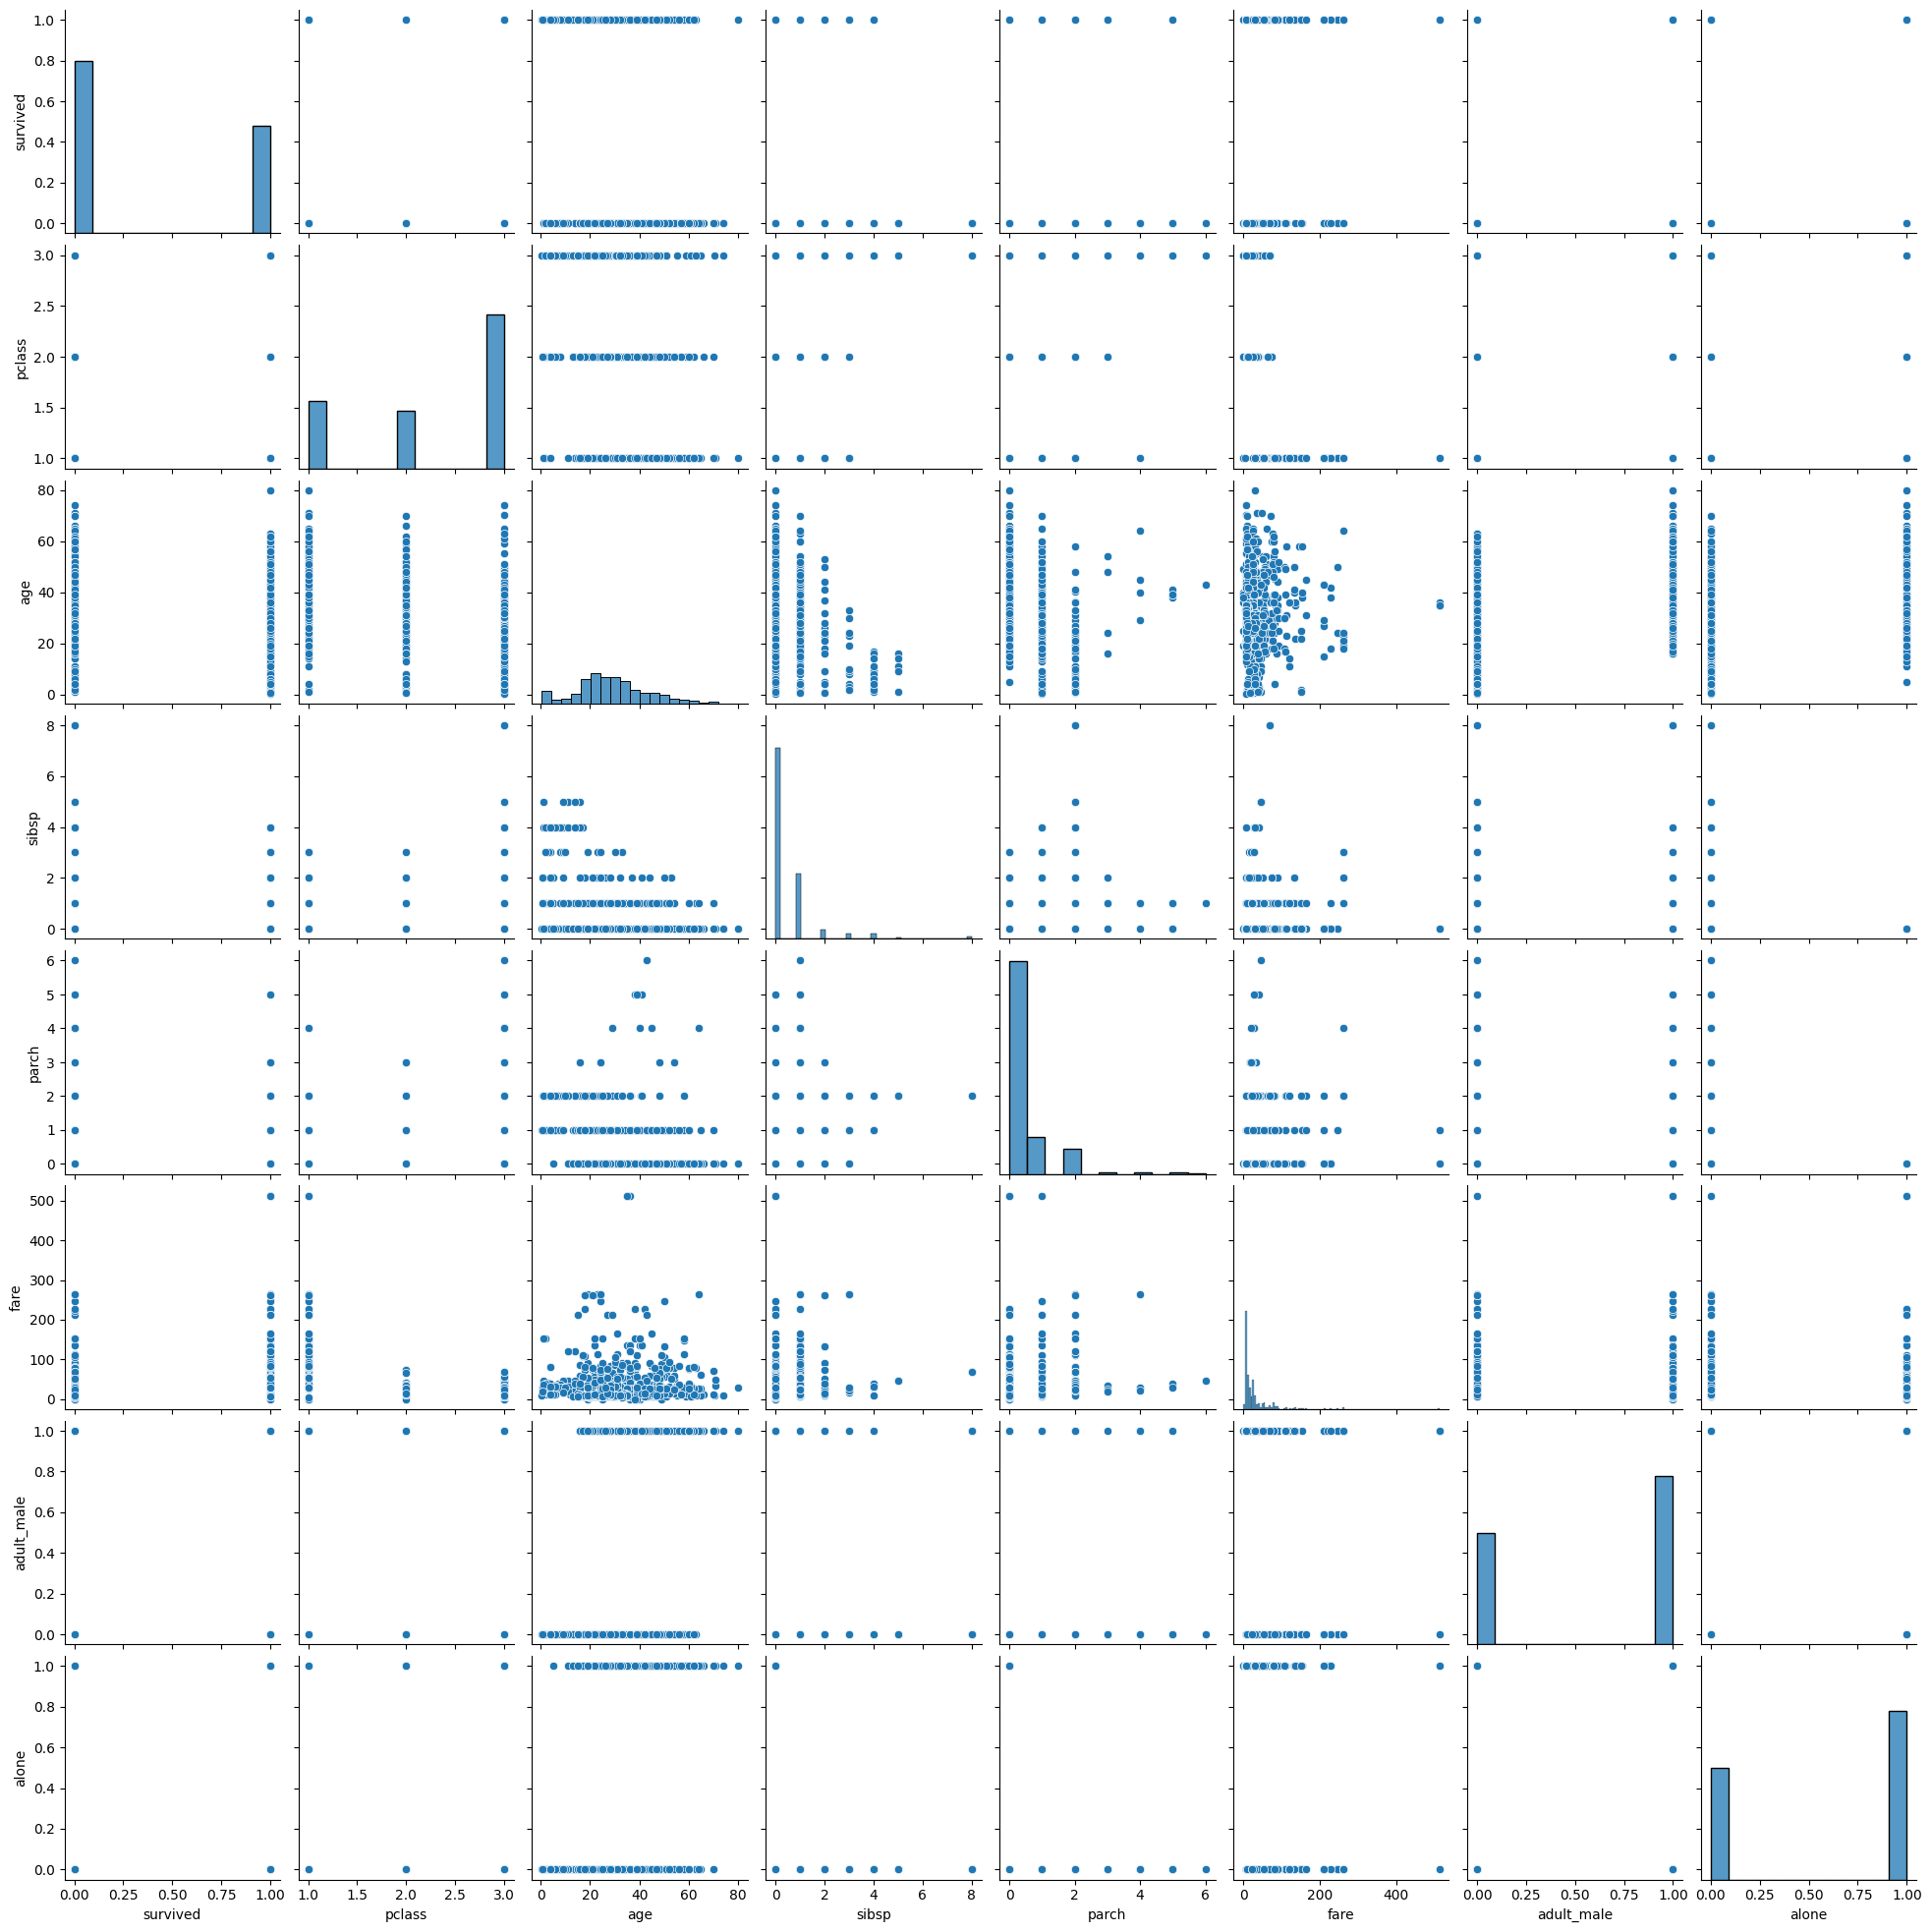

In [ ]:
sns.pairplot(titanic)
plt.show()


## **Correlation matrix Calculation**

<ipython-input-6-c3276ce92f0f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = titanic.corr()


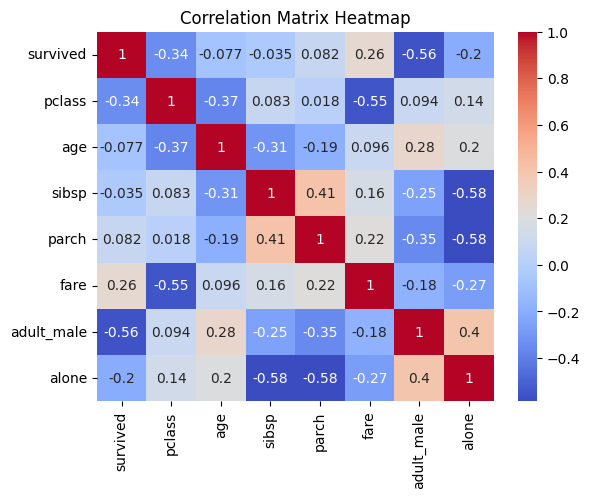

In [ ]:
# Calculate the correlation matrix
corr_matrix = titanic.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show();


In [ ]:
# Identify pairs with highest correlation coefficients
highest_corr = corr_matrix.unstack().sort_values(ascending=False)
print("Pairs with highest correlation coefficients:")
print(highest_corr.head(5))  # Print the top 5 pairs with highest correlation

# Identify pairs with lowest correlation coefficients
lowest_corr = corr_matrix.unstack().sort_values()
print("\nPairs with lowest correlation coefficients:")
print(lowest_corr.head(5))  # Print the top 5 pairs with lowest correlation


Pairs with highest correlation coefficients:
survived    survived      1.0
pclass      pclass        1.0
adult_male  adult_male    1.0
fare        fare          1.0
parch       parch         1.0
dtype: float64

Pairs with lowest correlation coefficients:
sibsp       alone      -0.584471
alone       sibsp      -0.584471
            parch      -0.583398
parch       alone      -0.583398
adult_male  survived   -0.557080
dtype: float64


## **Section02**

Exploring the Netflix dataset to understand the distribution of movies vs. TV shows, identify the
countries producing the most content, and analyze the trend of releases over the years. What genres
are most common, and how does the rating distribution vary across genres?
Dataset: Netflix Shows


## **Uploading Netflix Dataset**

In [ ]:
netflix_data = pd.read_csv('/content/netflix_titles.csv')


## **Displaying Data**

In [ ]:
print(netflix_data.head())  # Display the first few rows of the dataset


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021        2020.0  PG-13     90 min   
1  September 24, 2021        2021.0  TV-MA  2 Seasons   
2  September 24, 2021        

## **Ploting**

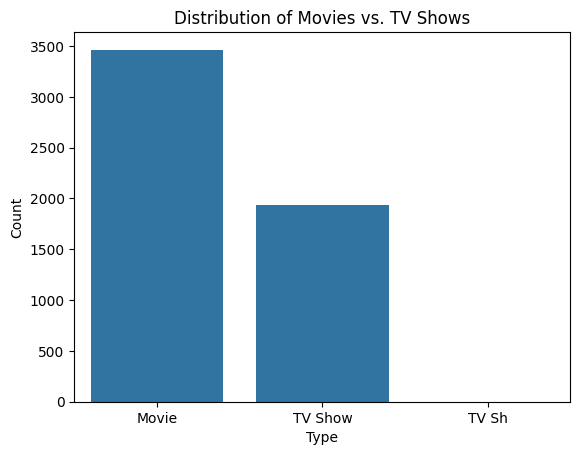

In [ ]:
sns.countplot(x='type', data=netflix_data)
plt.title('Distribution of Movies vs. TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


In [ ]:
top_countries = netflix_data['country'].value_counts().head(10)
print("Top Countries Producing Content:")
print(top_countries)


Top Countries Producing Content:
United States     1545
India              602
Japan              203
United Kingdom     190
South Korea        138
Spain              110
Canada              89
France              84
Nigeria             82
Mexico              70
Name: country, dtype: int64


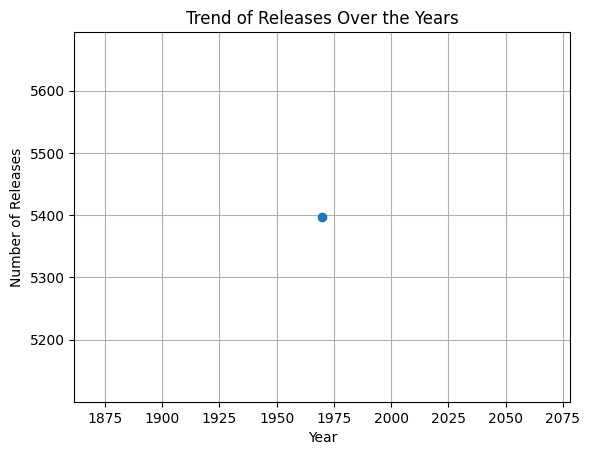

In [ ]:
netflix_data['release_year'] = pd.to_datetime(netflix_data['release_year'])
release_trend = netflix_data['release_year'].dt.year.value_counts().sort_index()

plt.plot(release_trend.index, release_trend.values, marker='o')
plt.title('Trend of Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()


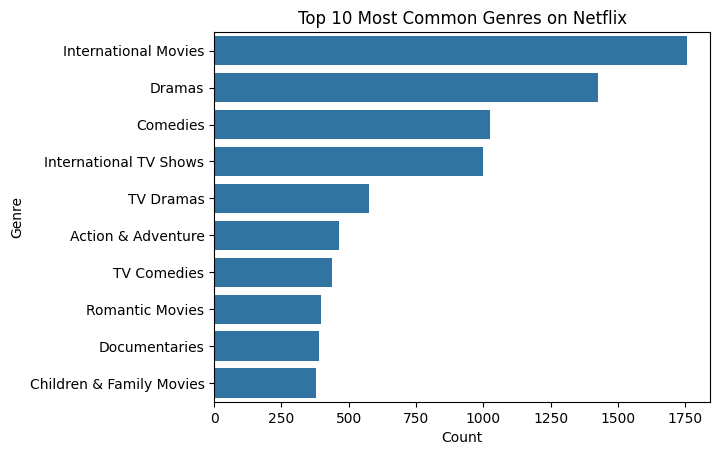

In [ ]:
# Split genres and explode into separate rows
genres_data = netflix_data['listed_in'].str.split(', ').explode()

# Count the occurrences of each genre and reset the index
genres_count = genres_data.value_counts().reset_index()

# Plot the most common genres
sns.barplot(x='listed_in', y='index', data=genres_count.head(10))
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()





In [ ]:
netflix_data = pd.DataFrame({
    'rating': [4.5, 3.8, 5.0, 2.9, 4.2],
    'listed_in': ['Comedy', 'Drama', 'Action', 'Thriller', 'Romance']
})

In [ ]:
genres_count = netflix_data['listed_in'].value_counts().reset_index().rename(columns={'index':'listed_in', 'listed_in':'count'})

<ipython-input-27-b21ff1b5762d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='listed_in', data=netflix_data, order=genres_count['listed_in'].head(10),


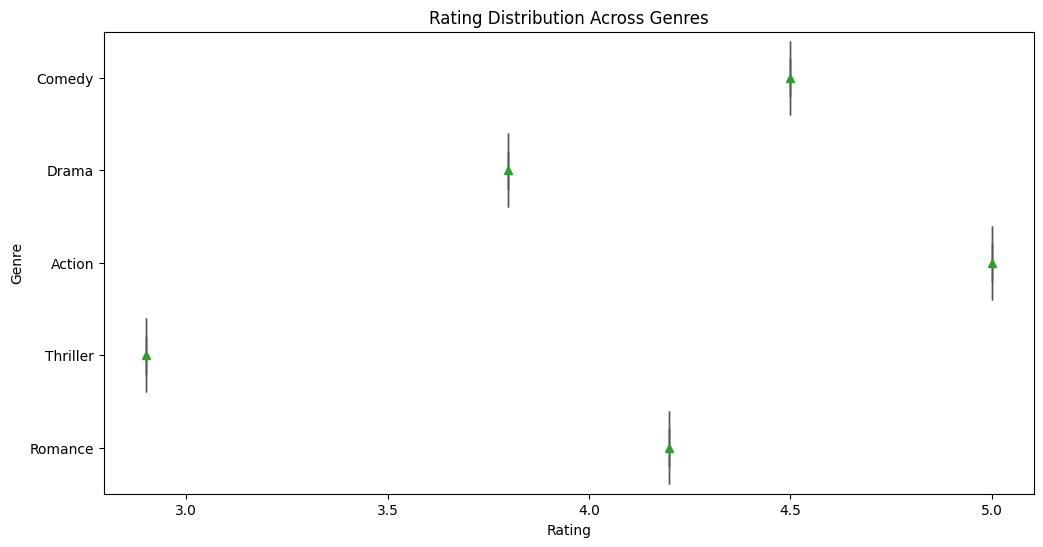

In [ ]:
boxprops = dict(zorder=2, alpha=0.5)

plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='listed_in', data=netflix_data, order=genres_count['listed_in'].head(10),
            palette='muted', showmeans=True)
plt.title('Rating Distribution Across Genres')
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.show()

## **Perform the following task:**
Conduct an exploratory data analysis on the Melbourne Housing Market dataset. Identify trends in
housing prices over time, analyze the impact of location, and explore the relationship between
property attributes (such as the number of rooms, type of property, and land size) and price.
Dataset: Melbourne Housing Market

## **Uploading Dataset**

In [ ]:
melbourne_data = pd.read_csv('/content/Malb_House_price prediction.csv')


## **Data Showing**

In [ ]:
print(melbourne_data.head())  # Display the first few rows of the dataset


                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [ ]:
# Check the column names in the DataFrame
print(melbourne_data.columns)



Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


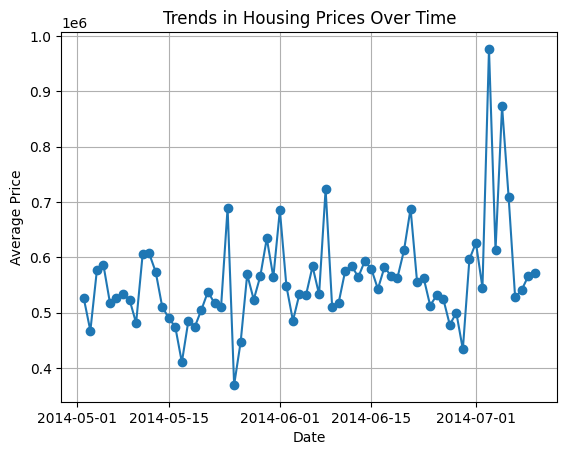

In [ ]:
# Convert the date column to datetime format
melbourne_data['date'] = pd.to_datetime(melbourne_data['date'])

# Group by date and calculate the mean price
price_trend = melbourne_data.groupby('date')['price'].mean()

# Plot the trend of housing prices over time
plt.plot(price_trend.index, price_trend.values, marker='o')
plt.title('Trends in Housing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


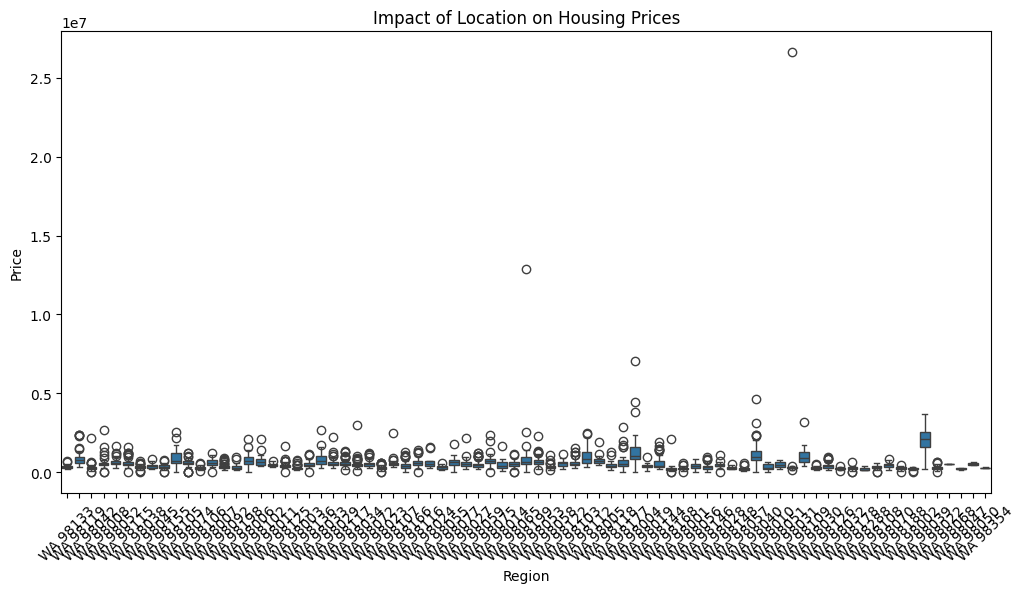

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='statezip', y='price', data=melbourne_data)
plt.title('Impact of Location on Housing Prices')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


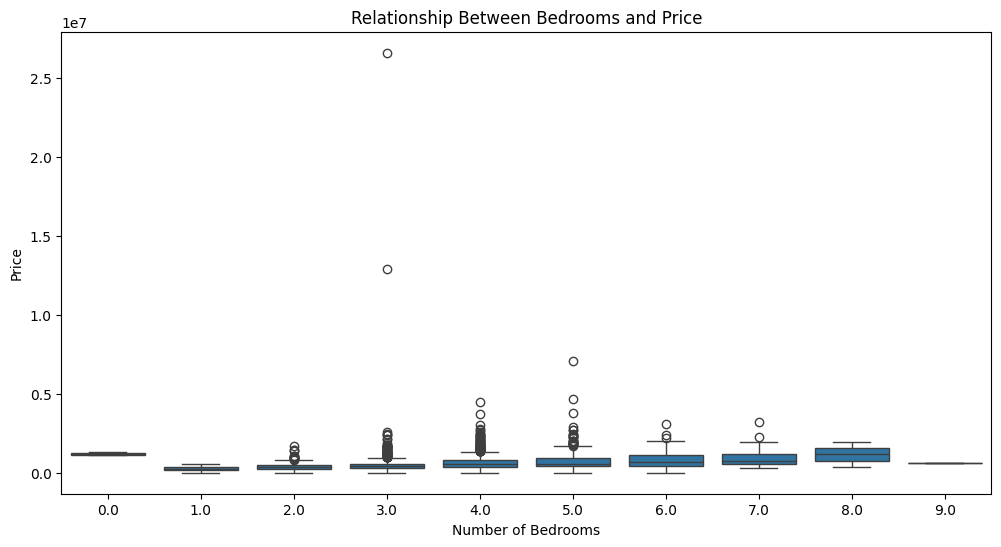

In [ ]:
# Boxplot for property type and price
plt.figure(figsize=(12, 6))
sns.boxplot(x='bedrooms', y='price', data=melbourne_data)
plt.title('Relationship Between Bedrooms and Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()







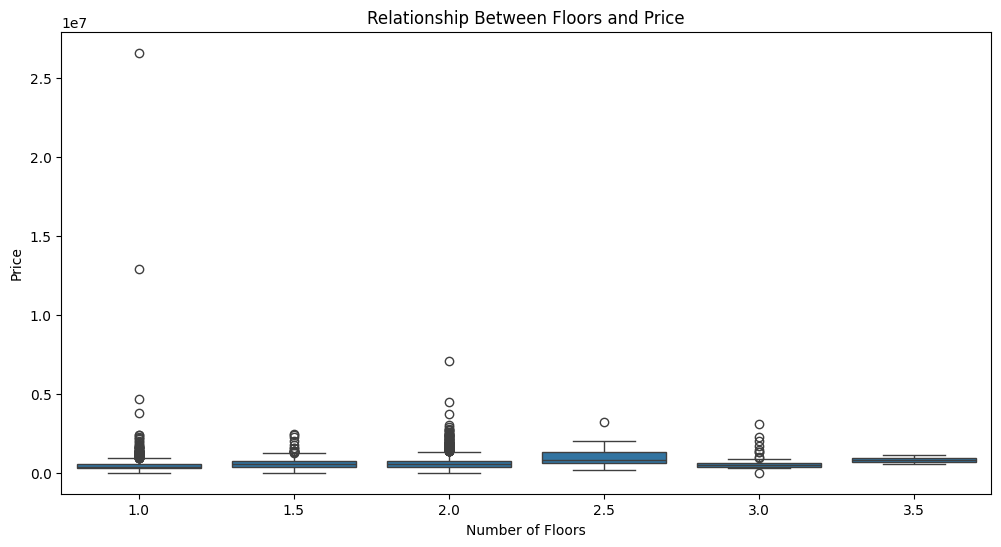

In [ ]:
# Boxplot for property type and price
plt.figure(figsize=(12, 6))
sns.boxplot(x='floors', y='price', data=melbourne_data)
plt.title('Relationship Between Floors and Price')
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.show()


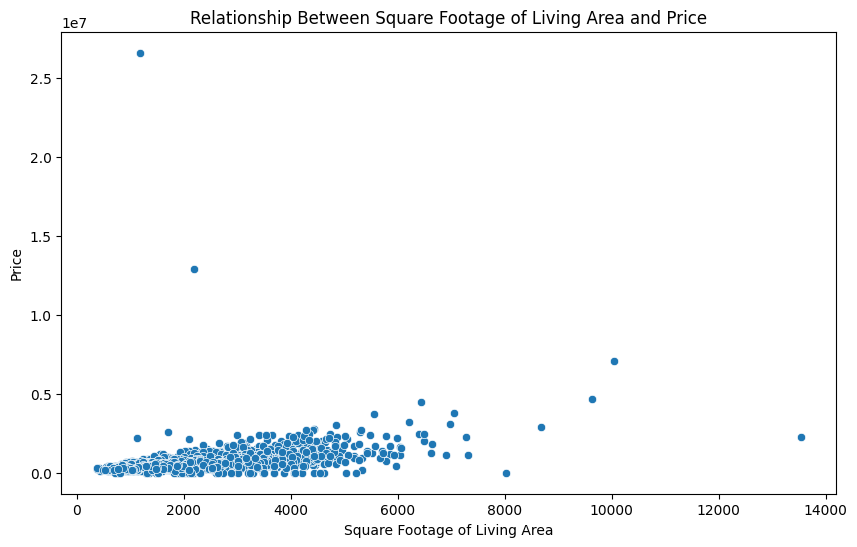

In [ ]:
# Scatterplot between land size and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=melbourne_data)
plt.title('Relationship Between Square Footage of Living Area and Price')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')
plt.show()

## **Analysing and describing the data**

**Analyze and describe the data by .head(), .shape , .describe() etc**

In [ ]:
import seaborn as sns

# Load the dataset
taxis_data = sns.load_dataset("taxis")


In [ ]:
# Display the first few rows of the dataset
print(taxis_data.head())

               pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      

# **Data Shape**

In [ ]:

# Display the shape of the dataset
print("Shape of the dataset:", taxis_data.shape)

Shape of the dataset: (6433, 14)


## **Descriptive Statistics Summary**

In [ ]:
# Generate descriptive statistics summary
print(taxis_data.describe())

        passengers     distance         fare         tip        tolls  \
count  6433.000000  6433.000000  6433.000000  6433.00000  6433.000000   
mean      1.539251     3.024617    13.091073     1.97922     0.325273   
std       1.203768     3.827867    11.551804     2.44856     1.415267   
min       0.000000     0.000000     1.000000     0.00000     0.000000   
25%       1.000000     0.980000     6.500000     0.00000     0.000000   
50%       1.000000     1.640000     9.500000     1.70000     0.000000   
75%       2.000000     3.210000    15.000000     2.80000     0.000000   
max       6.000000    36.700000   150.000000    33.20000    24.020000   

             total  
count  6433.000000  
mean     18.517794  
std      13.815570  
min       1.300000  
25%      10.800000  
50%      14.160000  
75%      20.300000  
max     174.820000  


 **Visualize the data with different plots ( Histogram, line or bar plot, Scatter plot, Box or violin
plots) **NOTE**: Also write the insights you learn from different plots.


## **Histogram & Box Plot**

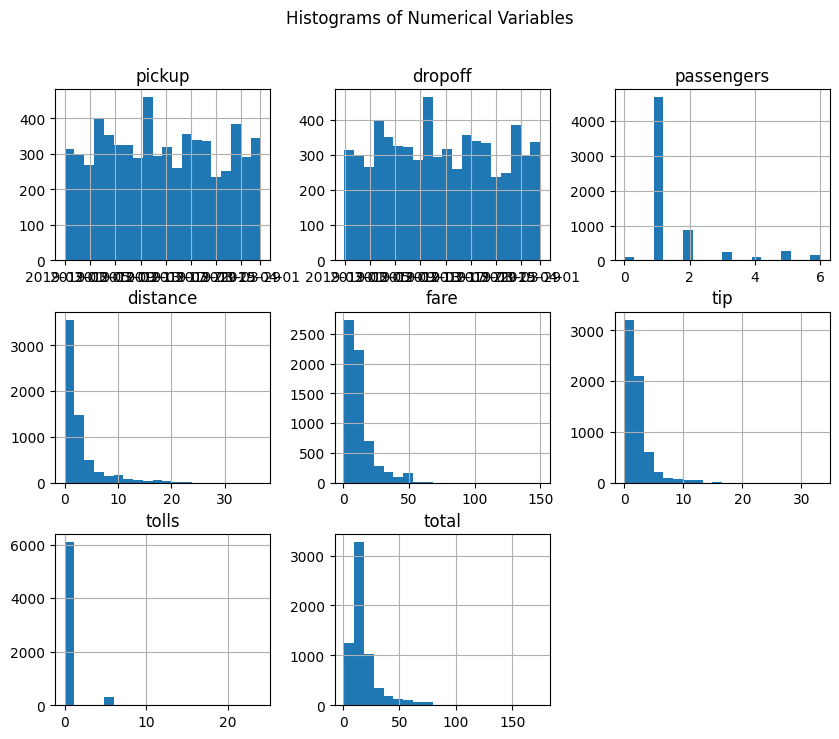

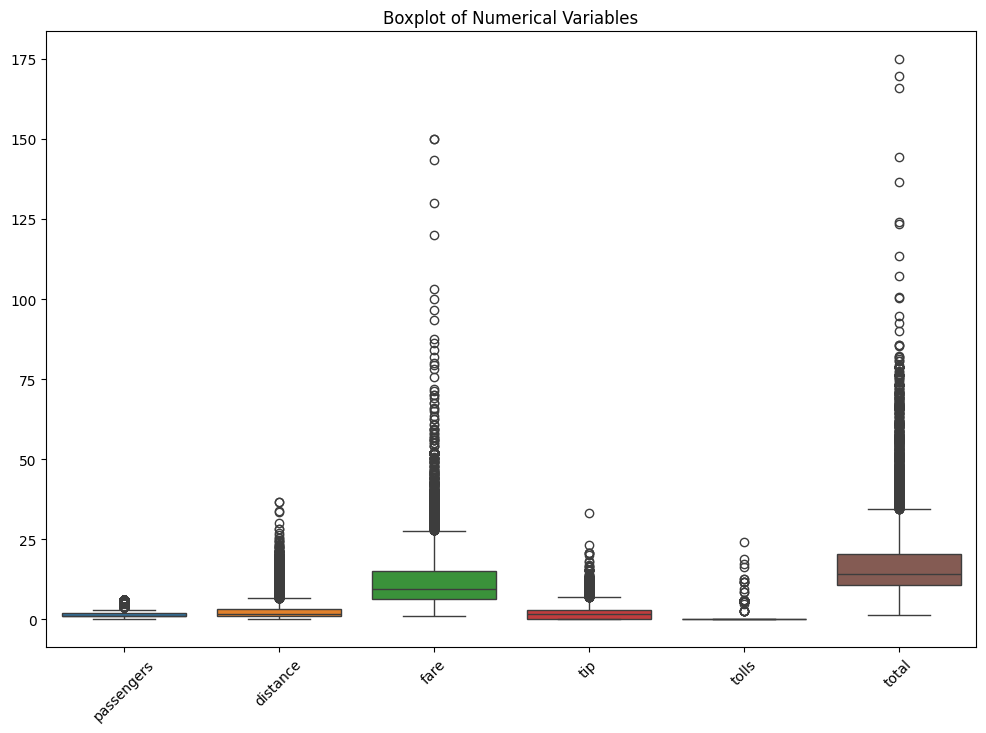

In [ ]:
# Histogram for numerical columns
taxis_data.hist(figsize=(10, 8), bins=20)
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Box plot for 'passengers', 'distance', 'fare', 'tip', 'tolls', 'total'
plt.figure(figsize=(12, 8))
sns.boxplot(data=taxis_data)
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()


## **Understanding the Data and Handling Missing Values:**

In [ ]:
# Check for missing values
print(taxis_data.isnull().sum())

# No missing values found


pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64


## **Strategies to Deal with Missing Values:**

Since there are no missing values, no strategies are required.

## **Identifying and Handling Outliers:**

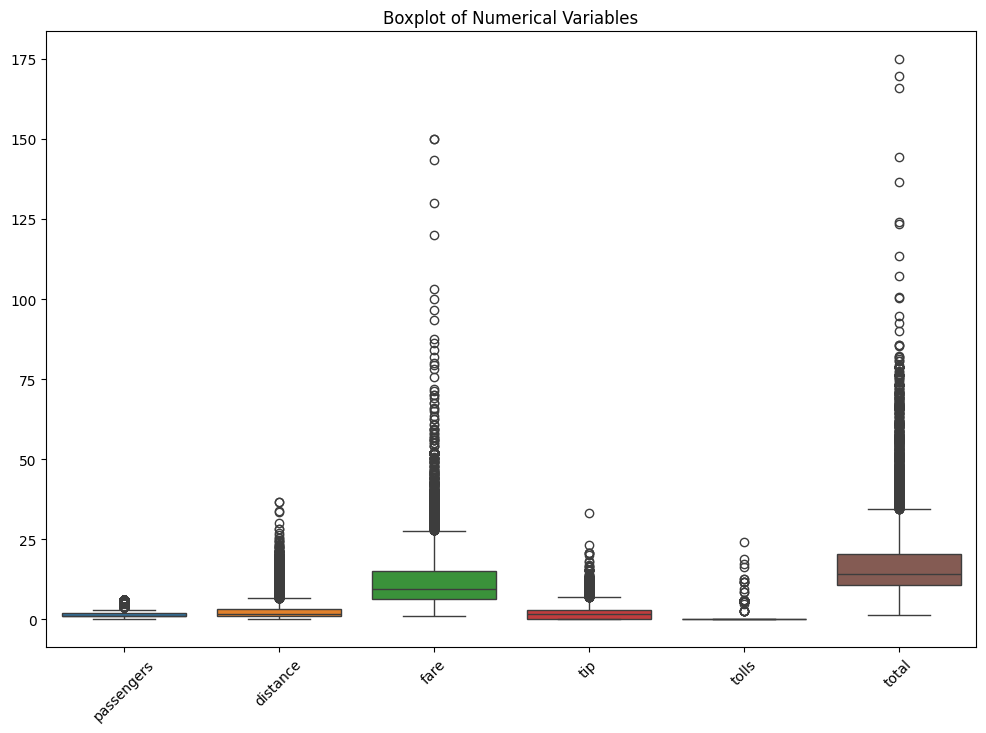

In [ ]:
# Detect outliers using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=taxis_data[['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']])
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd

In [ ]:
taxis_data.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

## **Convert Categorical Variables:**
No categorical variables found in the dataset


## **Numerical Features Transformation:**
No numerical features require transformation in this case

## **Scaling or Normalization:**
No scaling or normalization needed in this case

## **Checking for Inconsistencies or Errors in Data:**

In [ ]:
# Check for unrealistic values
# Example: Negative fare amounts
negative_fare_count = (taxis_data['fare'] < 0).sum()
print("Number of negative fare amounts:", negative_fare_count)

# Example: Unrealistic values
unrealistic_values_count = (taxis_data['total'] < taxis_data['fare'] + taxis_data['tip'] + taxis_data['tolls']).sum()
print("Number of unrealistic total values:", unrealistic_values_count)


Number of negative fare amounts: 0
Number of unrealistic total values: 0


## **Addressing Inconsistencies to Ensure Data Quality:**

Remove or correct inconsistent or erroneous data points.

## **Identifying Important Features for Predicting the Target Variable:**

No target variable specified, but if 'total' is considered as the target variable:
X = taxis_data.drop(['total'], axis=1)
y = taxis_data['total']

 model = RandomForestRegressor()
 model.fit(X, y)

 feature_importance = model.feature_importances_

## **Feature Selection Techniques:**

Use techniques like feature importance, recursive feature elimination to identify the most relevant features.

### **Strategies to Deal with Missing Values:**


* Imputation: Replace missing values with a statistical measure (e.g., mean, median, mode).
* Removal: Remove rows or columns with missing values.
* Forward or Backward Fill: Fill missing values with the value from the previous or next observation.

## **Exploring Relationships Between Numerical Features:**

<ipython-input-105-38f51e2c2f0c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(taxis_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


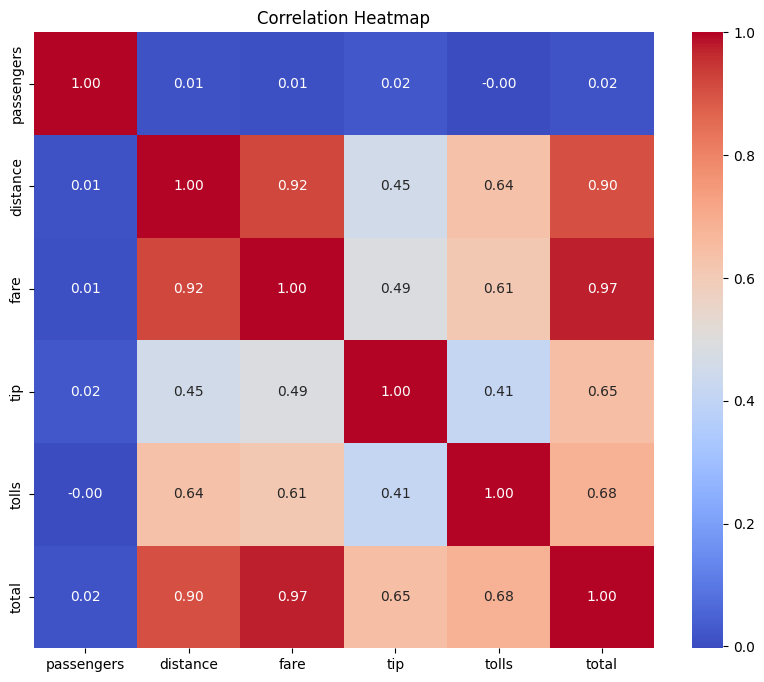

In [ ]:
# Relationship between numerical features through heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(taxis_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## **Perform Data Cleaning and Exploration using Pandas:**
● Load the famous Titanic dataset
● Check the first few rows and data types.
● Handle any missing values in the dataset, if present.
● Check for and handle any outliers in the data. (if there)
● Use matplotlib and seaborn to visualize the data distributions
● Create a new column indicating whether a passenger is a child, adult, or elderly based on their
age.
● Calculate the average fare paid by passengers in each class.
Dataset: Dataset is provided or you get from Titanic Dataset

## **Load the Titanic Dataset and Check the First Few Rows and Data Types**

In [ ]:
# Load the Titanic dataset
titanic_data = pd.read_csv("/content/Titanic-Dataset.csv")

# Display the first few rows of the dataset
print(titanic_data.head())

# Check the data types of each column
print(titanic_data.dtypes)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

## **Handling Missing Values**

In [ ]:
# Check for missing values
print(titanic_data.isnull().sum())

# Handle missing values
# Example: Replace missing values in 'Age' column with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## **Check for and Handle Outliers:**

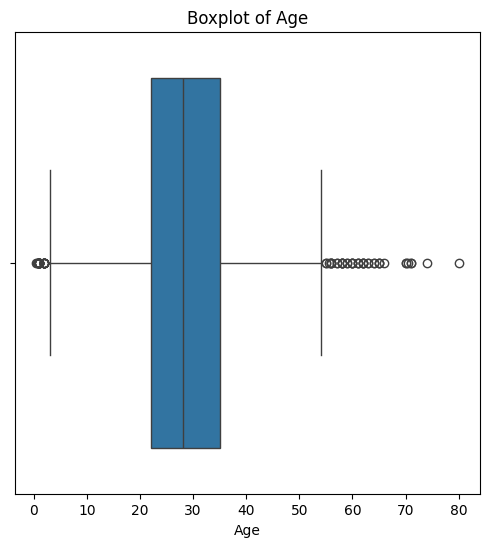

In [ ]:
# Check for outliers using box plots or summary statistics
# Example: Box plot for 'Age'
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.boxplot(x='Age', data=titanic_data)
plt.title('Boxplot of Age')
plt.show()

# Handle outliers if necessary (e.g., using IQR method)


## **Visualize Data Distributions:**

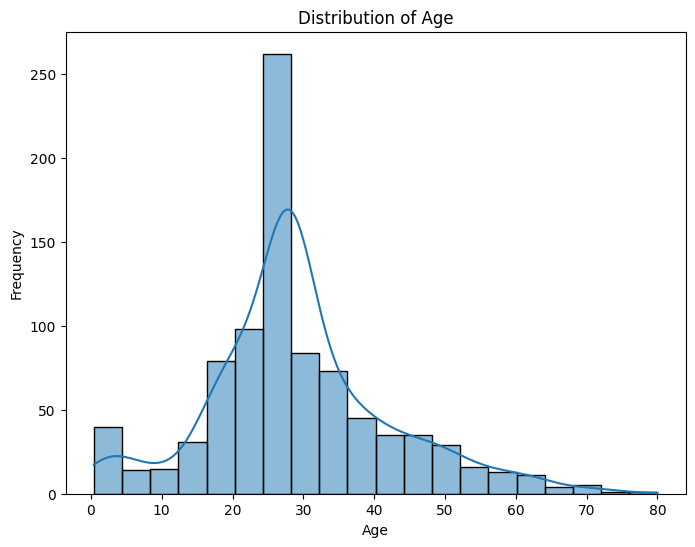

In [ ]:
# Histogram of 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(titanic_data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Other visualizations as needed for different variables


## **Create a New Column for Passenger Age Group:**

In [ ]:
# Define a function to categorize passengers into age groups
def age_group(age):
    if age < 18:
        return 'Child'
    elif age >= 18 and age < 65:
        return 'Adult'
    else:
        return 'Elderly'

# Apply the function to create a new column 'Age_Group'
titanic_data['Age_Group'] = titanic_data['Age'].apply(age_group)


## **Calculate Average Fare by Passenger Class:**

In [ ]:
# Group by 'Pclass' and calculate the mean fare
average_fare_by_class = titanic_data.groupby('Pclass')['Fare'].mean()
print("Average Fare by Passenger Class:")
print(average_fare_by_class)


Average Fare by Passenger Class:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


#                                           **THE END**